**Vedant Modak**
  | BE(IT) undergrad @ PES Modern College of Engineering,Pune.

**Health-Care Analysis**

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [293]:
df=pd.read_csv('F:\Data Analytics\Portfolio\Projects\Project - 3 (HealthCare analysis)\BRCA.csv')

In [294]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [295]:
df.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
df.shape

(341, 16)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

**Cleaning the dataset**

In [298]:
df = df.drop_duplicates()

In [299]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [300]:
df.isnull().sum()

Patient_ID             1
Age                    1
Gender                 1
Protein1               1
Protein2               1
Protein3               1
Protein4               1
Tumour_Stage           1
Histology              1
ER status              1
PR status              1
HER2 status            1
Surgery_type           1
Date_of_Surgery        1
Date_of_Last_Visit    18
Patient_Status        14
dtype: int64

In [301]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [302]:
df.dropna(inplace=True)

In [303]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [304]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

**Removing Outliers**

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

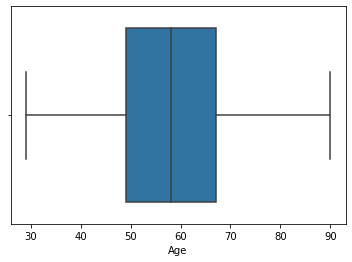

In [305]:
sns.boxplot(df['Age'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Protein1'>

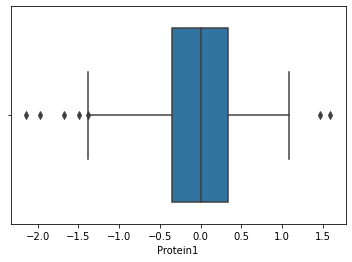

In [306]:
sns.boxplot(df['Protein1'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Protein2'>

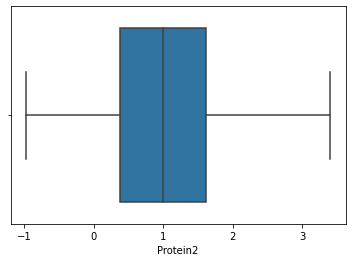

In [307]:
sns.boxplot(df['Protein2'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Protein3'>

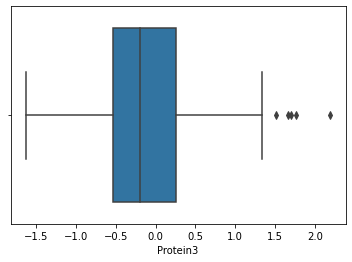

In [308]:
sns.boxplot(df['Protein3'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Protein4'>

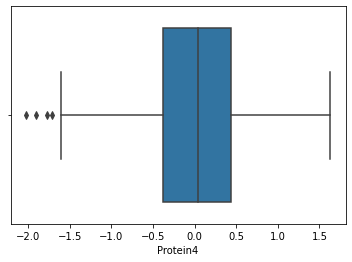

In [309]:
sns.boxplot(df['Protein4'])

In [310]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [311]:
col_name = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']
for col in col_name:
    df[col] = remove_outliers(df[col])

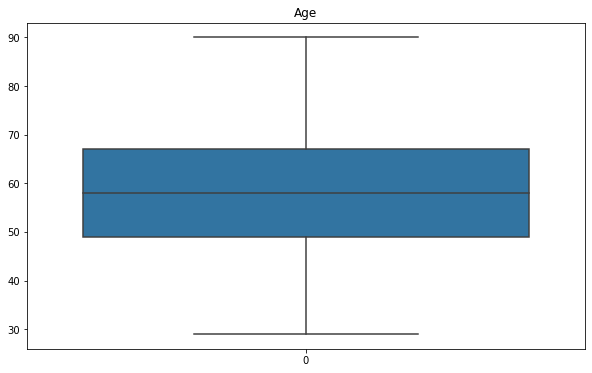

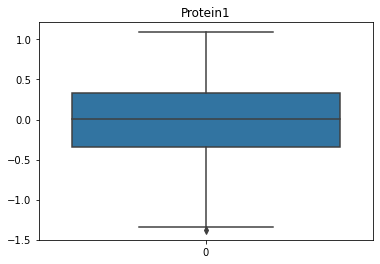

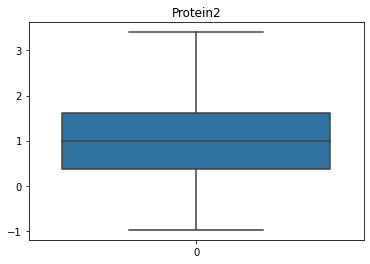

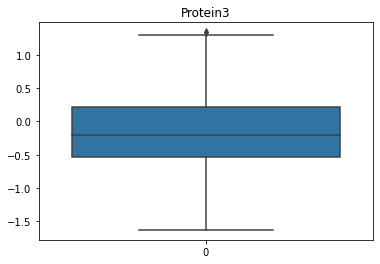

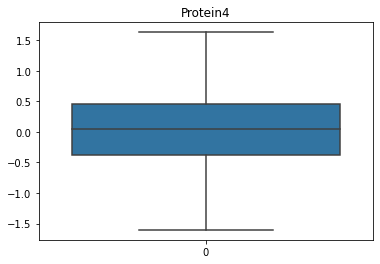

In [312]:
plt.figure(figsize=(10, 6)) 

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

**Converting categorical variables into numerical format using encoding**

In [313]:
df.head(5)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [314]:
del df['Patient_ID']

In [315]:
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead


**Changing data types and converting categorical values into numerical values using Label encoding**

In [316]:
df["Gender"] = df["Gender"].astype("str")
df["Tumour_Stage"] = df["Tumour_Stage"].astype("str")
df["Histology"] = df["Histology"].astype("str")
df["ER status"] = df["ER status"].astype("str")
df["PR status"] = df["PR status"].astype("str")
df["HER2 status"] = df["HER2 status"].astype("str")
df["Surgery_type"] = df["Surgery_type"].astype("str")
df["Patient_Status"] = df["Patient_Status"].astype("str")

In [317]:
from sklearn.preprocessing import LabelEncoder

In [318]:
encode = LabelEncoder()
label1=encode.fit_transform(df["Gender"])
label2=encode.fit_transform(df["Tumour_Stage"])
label3=encode.fit_transform(df["Histology"])
label4=encode.fit_transform(df["ER status"])
label5=encode.fit_transform(df["PR status"])
label6=encode.fit_transform(df["HER2 status"])
label7=encode.fit_transform(df["Surgery_type"])
label8=encode.fit_transform(df["Patient_Status"])

In [319]:
df=df.drop("Gender",axis='columns')
df=df.drop("Tumour_Stage",axis='columns')
df=df.drop("Histology",axis='columns')
df=df.drop("ER status",axis='columns')
df=df.drop("PR status",axis='columns')
df=df.drop("HER2 status",axis='columns')
df=df.drop("Surgery_type",axis='columns')
df=df.drop("Patient_Status",axis='columns')

In [320]:
df.head(2)

,Age,Protein1,Protein2,Protein3,Protein4,Date_of_Surgery,Date_of_Last_Visit
0,36.0,0.080353,0.42638,0.54715,0.273680,15-Jan-17,19-Jun-17
1,43.0,-0.420320,0.57807,0.61447,-0.031505,26-Apr-17,09-Nov-18


In [321]:
df["Gender"]=label1
df["Tumour_Stage"]=label2
df["Histology"]=label3
df["ER status"]=label4
df["PR status"]=label5
df["HER2 status"]=label6
df["Surgery_type"]=label7
df["Patient_Status"]=label8

In [322]:
df.head(10)

,Age,Protein1,Protein2,Protein3,Protein4,Date_of_Surgery,Date_of_Last_Visit,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,0.080353,0.42638,0.547150,0.273680,15-Jan-17,19-Jun-17,0,2,0,0,0,0,1,0
1,43.0,-0.420320,0.57807,0.614470,-0.031505,26-Apr-17,09-Nov-18,0,1,2,0,0,0,0,1
2,69.0,0.213980,1.31140,-0.327470,-0.234260,08-Sep-17,09-Jun-18,0,2,0,0,0,0,2,0
3,56.0,0.345090,-0.21147,-0.193040,0.124270,25-Jan-17,12-Jul-17,0,1,0,0,0,0,1,0
4,56.0,0.221550,1.90680,0.520450,-0.311990,06-May-17,27-Jun-19,0,1,0,0,0,0,2,1
5,84.0,-0.081872,1.72410,-0.057335,0.043025,18-Sep-17,15-Nov-21,1,2,0,0,0,0,1,0
6,53.0,-0.069535,1.41830,-0.361050,0.391580,04-Feb-17,07-Feb-18,0,1,0,0,0,0,3,0
8,77.0,-0.151750,-0.66332,1.189400,0.217180,28-Sep-17,28-Sep-18,0,1,0,0,0,0,1,0
9,40.0,-0.565700,1.26680,-0.293460,0.193950,14-Feb-17,15-Dec-17,0,1,1,0,0,1,2,0
10,71.0,-0.223050,0.50594,-0.349430,-0.835300,26-May-17,19-Dec-17,0,1,0,0,0,0,0,0


In [323]:
del df['Date_of_Surgery']

In [324]:
del df['Date_of_Last_Visit']

In [325]:
df.head(10)

,Age,Protein1,Protein2,Protein3,Protein4,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,0.080353,0.42638,0.547150,0.273680,0,2,0,0,0,0,1,0
1,43.0,-0.420320,0.57807,0.614470,-0.031505,0,1,2,0,0,0,0,1
2,69.0,0.213980,1.31140,-0.327470,-0.234260,0,2,0,0,0,0,2,0
3,56.0,0.345090,-0.21147,-0.193040,0.124270,0,1,0,0,0,0,1,0
4,56.0,0.221550,1.90680,0.520450,-0.311990,0,1,0,0,0,0,2,1
5,84.0,-0.081872,1.72410,-0.057335,0.043025,1,2,0,0,0,0,1,0
6,53.0,-0.069535,1.41830,-0.361050,0.391580,0,1,0,0,0,0,3,0
8,77.0,-0.151750,-0.66332,1.189400,0.217180,0,1,0,0,0,0,1,0
9,40.0,-0.565700,1.26680,-0.293460,0.193950,0,1,1,0,0,1,2,0
10,71.0,-0.223050,0.50594,-0.349430,-0.835300,0,1,0,0,0,0,0,0


In [326]:
df["Age"] = df["Age"].astype("int64")
df["Protein1"] = df["Protein1"].astype("float32")
df["Protein2"] = df["Protein2"].astype("float32")
df["Protein3"] = df["Protein3"].astype("float32")
df["Protein4"] = df["Protein4"].astype("float32")

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    int64  
 1   Protein1        310 non-null    float32
 2   Protein2        317 non-null    float32
 3   Protein3        312 non-null    float32
 4   Protein4        313 non-null    float32
 5   Gender          317 non-null    int32  
 6   Tumour_Stage    317 non-null    int32  
 7   Histology       317 non-null    int32  
 8   ER status       317 non-null    int32  
 9   PR status       317 non-null    int32  
 10  HER2 status     317 non-null    int32  
 11  Surgery_type    317 non-null    int32  
 12  Patient_Status  317 non-null    int32  
dtypes: float32(4), int32(8), int64(1)
memory usage: 29.8 KB


In [328]:
df.corr()

,Age,Protein1,Protein2,Protein3,Protein4,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
Age,1.000000,0.010977,-0.011387,-0.033845,0.085391,0.026696,-0.144483,-0.107611,NaN,NaN,-0.068386,-0.034617,-0.012410
Protein1,0.010977,1.000000,0.199443,-0.134835,0.210114,0.102714,-0.006310,0.053107,NaN,NaN,-0.000849,-0.096339,-0.040342
Protein2,-0.011387,0.199443,1.000000,-0.385548,0.094741,0.000406,-0.049881,0.013074,NaN,NaN,-0.013568,-0.045292,0.074810
Protein3,-0.033845,-0.134835,-0.385548,1.000000,0.090382,-0.012436,0.010230,-0.008354,NaN,NaN,-0.001682,-0.049815,0.028212
Protein4,0.085391,0.210114,0.094741,0.090382,1.000000,-0.019629,-0.056795,0.051306,NaN,NaN,-0.007789,-0.120778,0.111566
Gender,0.026696,0.102714,0.000406,-0.012436,-0.019629,1.000000,0.033881,0.034995,NaN,NaN,-0.035872,0.026380,0.015509
Tumour_Stage,-0.144483,-0.006310,-0.049881,0.010230,-0.056795,0.033881,1.000000,-0.014403,NaN,NaN,0.141031,0.010979,0.056747
Histology,-0.107611,0.053107,0.013074,-0.008354,0.051306,0.034995,-0.014403,1.000000,NaN,NaN,-0.012156,-0.052023,-0.007823
ER status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PR status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

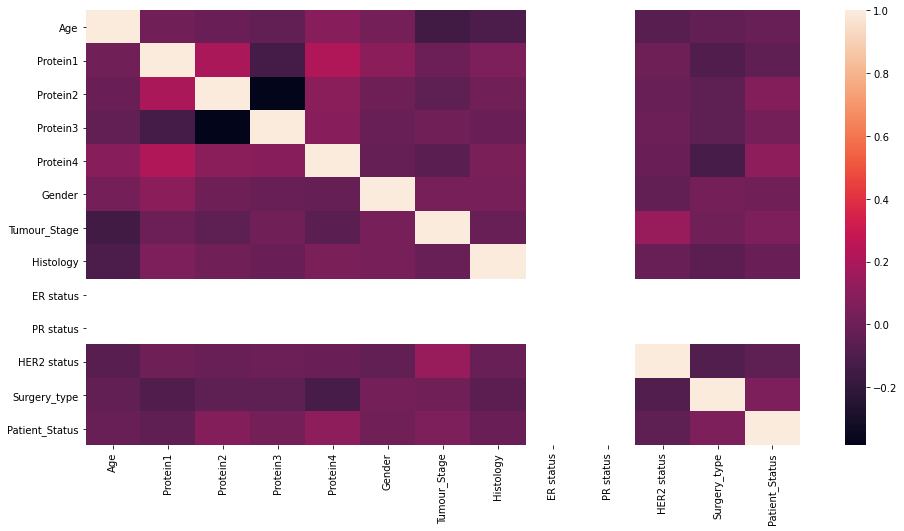

In [329]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr())

**General Analysis**

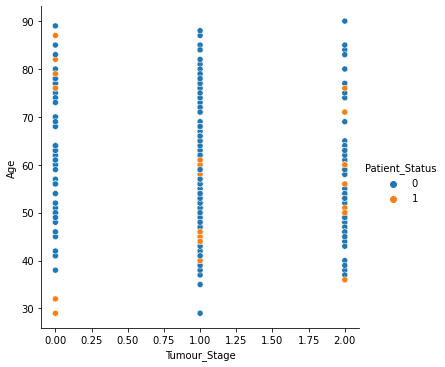

In [330]:
sns.relplot(x = "Tumour_Stage", y = "Age", hue= "Patient_Status", data =df);

This tells us as the age increases, the chances of death also increase irrespective of the stage of the tumor.

Patients are more likely to be alive if the tumore stage is below 1.

**On the basis of this data, lets predict whether patient will be Alive or Dead**

In [331]:
feature=['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']

In [332]:
X=df[feature]
X.columns

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Gender',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type'],
      dtype='object')

In [333]:
y=df[['Patient_Status']]
y.columns

Index(['Patient_Status'], dtype='object')

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [336]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [337]:
X_train.shape

(253, 12)

In [338]:
X_test.shape

(64, 12)

In [339]:
y_train.shape

(253, 1)

In [340]:
y_test.shape

(64, 1)

**Prediction using Decision Tree Classifier**

In [341]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [342]:
Cancer_1=DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
Cancer_1.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [343]:
y_predicted=Cancer_1.predict(X_test)
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [344]:
accuracy_score(y_test, y_predicted)*100

84.375

This model is 84% accurate

**Prediction using Random Forest Classifier**

In [345]:
from sklearn.ensemble import RandomForestClassifier
Cancer_2=RandomForestClassifier()
Cancer_2.fit(X_train,y_train)

<ipython-input-345-8528a592f030>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Cancer_2.fit(X_train,y_train)


RandomForestClassifier()

In [346]:
y_predicted_2=Cancer_2.predict(X_test)
y_predicted_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [347]:
accuracy_score(y_test, y_predicted_2)*100

89.0625

This model is 89% accurate

**Comparing the results of the models**

In [348]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [349]:
Cancer_1_eval = evaluate_model(Cancer_1, X_test, y_test)

# Print result
print('Accuracy:', Cancer_1_eval['acc'])
print('Precision:', Cancer_1_eval['prec'])
print('Recall:', Cancer_1_eval['rec'])
print('F1 Score:', Cancer_1_eval['f1'])
print('Cohens Kappa Score:', Cancer_1_eval['kappa'])
print('Area Under Curve:', Cancer_1_eval['auc'])
print('Confusion Matrix:\n', Cancer_1_eval['cm'])

Accuracy: 0.84375
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: -0.08108108108108114
Area Under Curve: 0.32614942528735635
Confusion Matrix:
 [[54  4]
 [ 6  0]]


In [350]:
Cancer_2_eval = evaluate_model(Cancer_2, X_test, y_test)

# Print result
print('Accuracy:', Cancer_2_eval['acc'])
print('Precision:', Cancer_2_eval['prec'])
print('Recall:', Cancer_2_eval['rec'])
print('F1 Score:', Cancer_2_eval['f1'])
print('Cohens Kappa Score:', Cancer_2_eval['kappa'])
print('Area Under Curve:', Cancer_2_eval['auc'])
print('Confusion Matrix:\n', Cancer_2_eval['cm'])

Accuracy: 0.890625
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: -0.02752293577981657
Area Under Curve: 0.6494252873563219
Confusion Matrix:
 [[57  1]
 [ 6  0]]


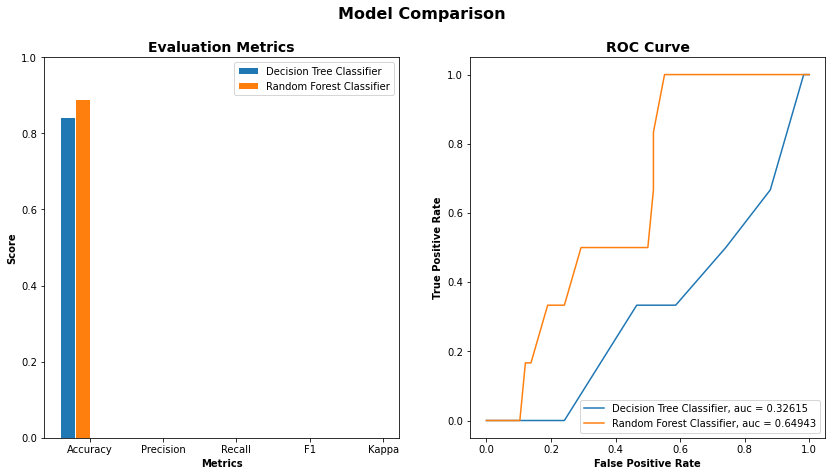

In [351]:
Cancer_1_eval = evaluate_model(Cancer_1, X_test, y_test)
Cancer_2_eval = evaluate_model(Cancer_2, X_test, y_test)




# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
Cancer_1_score = [Cancer_1_eval['acc'], Cancer_1_eval['prec'], Cancer_1_eval['rec'], Cancer_1_eval['f1'], Cancer_1_eval['kappa']]
Cancer_2_score = [Cancer_2_eval['acc'], Cancer_2_eval['prec'], Cancer_2_eval['rec'], Cancer_2_eval['f1'], Cancer_2_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(Cancer_1_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, Cancer_1_score, width=barWidth, edgecolor='white', label='Decision Tree Classifier')
ax1.bar(r2, Cancer_2_score, width=barWidth, edgecolor='white', label='Random Forest Classifier')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(Cancer_1_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(Cancer_1_eval['fpr'], Cancer_1_eval['tpr'], label='Decision Tree Classifier, auc = {:0.5f}'.format(Cancer_1_eval['auc']))
ax2.plot(Cancer_2_eval['fpr'], Cancer_2_eval['tpr'], label='Random Forest Classifier, auc = {:0.5f}'.format(Cancer_2_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()
